- iris dataset

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc

In [81]:
df = sns.load_dataset('iris')

In [82]:
df.value_counts(df['species'])

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [83]:
x = df.drop("species", axis=1)
y = df['species']

In [84]:
# Encode the target variable into numeric labels - There are many methods but i use 3 methids here

y_encoded = pd.factorize(y)[0]         # 1st method
y_encoded

y_cat = y.astype('category').cat.codes        # 2nd method
y_cat

le = LabelEncoder()
y_le = le.fit_transform(y)         # 3rd method
y_le

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y_le, test_size=0.2, random_state=24)

In [86]:
# standardize the features (Important for Logistic Regression)

# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit(x_test)

In [87]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [89]:
y_pred = model.predict(x_test)

In [92]:
class_report = classification_report(y_test, y_pred)
print("Classificstion Report")
print(class_report)

Classificstion Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [94]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(confusion_mat)

Confusion Matrix :
[[10  0  0]
 [ 0  4  0]
 [ 0  0 16]]


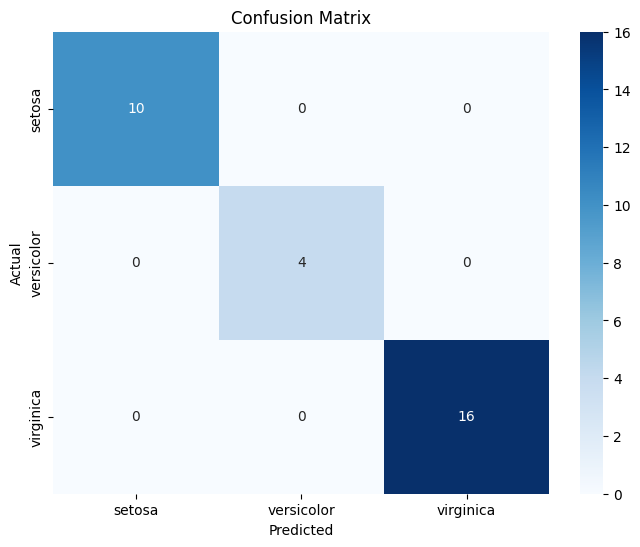

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=df["species"].unique(), yticklabels=df["species"].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()